Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.1744 - accuracy: 0.9454 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0318 - val_accuracy: 0.9897
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0316 - val_accuracy: 0.9911
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0255 - val_accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9885
Test accuracy: 0.9884999990463257


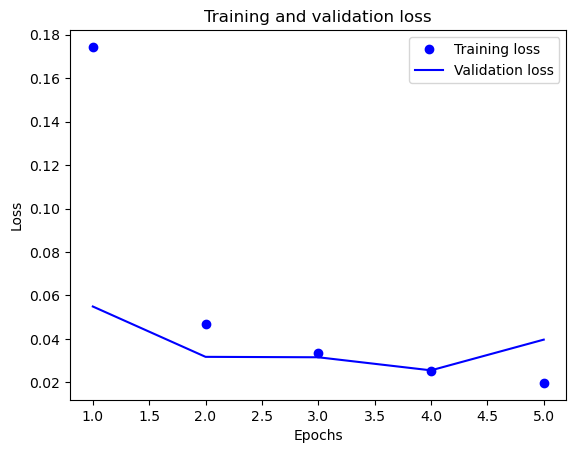

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import os

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the images to add a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Define the ConvNet model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Save the model
model.save(os.path.join("dsc650", "assignments", "assignment06", "results", "mnist_convnet_model.h5"))

# Generate predictions and metrics
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot the validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join("dsc650", "assignments", "assignment06", "results", "validation_accuracy.png"))

plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig(os.path.join("dsc650", "assignments", "assignment06", "results", "validation_loss.png"))
